We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [2]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-15 11:59:56--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.78, 13.227.223.117, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [3]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [4]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia


In [5]:
df[df['geoId'] == 'AI']['popData2018'].iloc[0]

nan

To make room in the dataframe for future predictions and smoothed input data, we add columns for those values and set them to missing for now.

In [6]:
df['pcases']  = np.nan
df['scases']  = np.nan
df['pdeaths'] = np.nan
df['sdeaths'] = np.nan

Last check of our source dataframe.

In [7]:
df.count()

dateRep                    16949
day                        16949
month                      16949
year                       16949
cases                      16949
deaths                     16949
countriesAndTerritories    16949
geoId                      16949
countryterritoryCode       16797
popData2018                16743
continentExp               16949
pcases                         0
scases                         0
pdeaths                        0
sdeaths                        0
dtype: int64

We pivot to a country by column format.

In [8]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0  259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-14     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[136 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [9]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('91 days'))
df_geo = df_geo.reindex(new_index)
df_geo.describe()

cases                                                           \
geoId         AD          AE          AF         AG         AI         AL   
count  62.000000  130.000000  126.000000  56.000000  49.000000  67.000000   
mean   12.258065  156.815385   41.476190   0.446429   0.061224  13.134328   
std    12.695598  235.589901   78.048673   1.174264   0.316765   8.022498   
min     0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
25%     1.000000    0.000000    0.000000   0.000000   0.000000   7.000000   
50%     8.000000    1.000000    0.000000   0.000000   0.000000  12.000000   
75%    19.750000  374.500000   47.500000   0.000000   0.000000  17.500000   
max    43.000000  783.000000  369.000000   6.000000   2.000000  34.000000   

                                                       ... pdeaths            \
geoId          AM         AO          AR           AT  ...      VC   VE   VG   
count  127.000000  54.000000   69.000000   136.000000  ...     0.0  0.0  0.0   
mean    29.275591   0.833333   99.507246   117.382353  ...     NaN  NaN  NaN   
std     43.018947   1.563137   93.813429   211.148361  ...     NaN  NaN  NaN   
min      0.000000   0.000000    0.000000     0.000000  ...     NaN  NaN  NaN   
25%      0.000000   0.000000   14.000000     0.000000  ...     NaN  NaN  NaN   
50%      0.000000   0.000000   90.000000    11.000000  ...     NaN  NaN  NaN   
75%     48.000000   1.000000  146.000000   118.750000  ...     NaN  NaN  NaN   
max    180.000000   7.000000  529.000000  1141.000000  ...     NaN  NaN  NaN   

                                          
geoId   VI   VN   XK   YE   ZA   ZM   ZW  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [10]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    227.000000
mean     477.000000
std       65.673435
min      364.000000
25%      420.500000
50%      477.000000
75%      533.500000
max      590.000000
Name: daynum, dtype: float64

For each country we create a simple dataframe to contain the source values for our fitting algorithm. We take the `mean` of two  days to smooth out frequent reporting delays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 1 in 100.000 of the population and take the logarithm.

In [11]:
# Suppress warnings on memory usage of multiple plots

import matplotlib as mpl
mpl.rc('figure', max_open_warning=0)

RU factors [-6.58421706e-04  6.59602215e-01 -1.61145640e+02] residuals 0.07621307054533623
US factors [-6.41687979e-04  6.11945689e-01 -1.41357673e+02] residuals 0.49926587120780236
BR factors [-2.27235603e-04  2.44010117e-01 -6.11868577e+01] residuals 0.18194955232214016
AT factors [-2.36868636e-03  2.15141454e+00 -4.85739660e+02] residuals 0.5327214826479835
CH factors [-1.16149164e-03  1.06309713e+00 -2.40335078e+02] residuals 1.2684544080291196
DE factors [-6.02598382e-04  5.55536623e-01 -1.24445550e+02] residuals 1.3980080398080552
IT factors [-5.78256586e-04  5.33003073e-01 -1.19148989e+02] residuals 0.8621434788737886
ES factors [-7.75389140e-04  7.13634980e-01 -1.60485846e+02] residuals 2.560227074521944
FR factors [-7.87458921e-04  7.29835486e-01 -1.65585382e+02] residuals 1.6541346391074474
SE factors [-3.64871169e-04  3.51701193e-01 -8.19763361e+01] residuals 0.6225288977469858
UK factors [-7.03847122e-04  6.73799591e-01 -1.57485492e+02] residuals 0.46713019819752494
IE fact

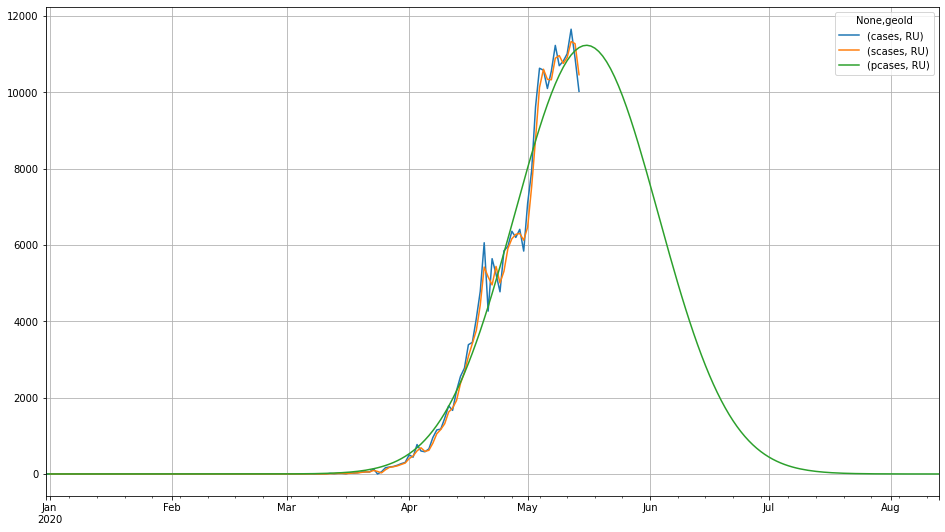

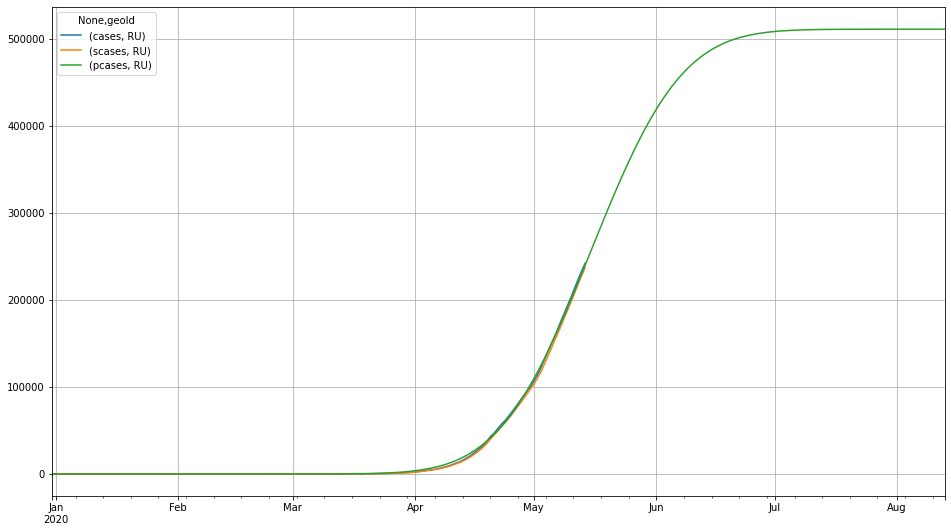

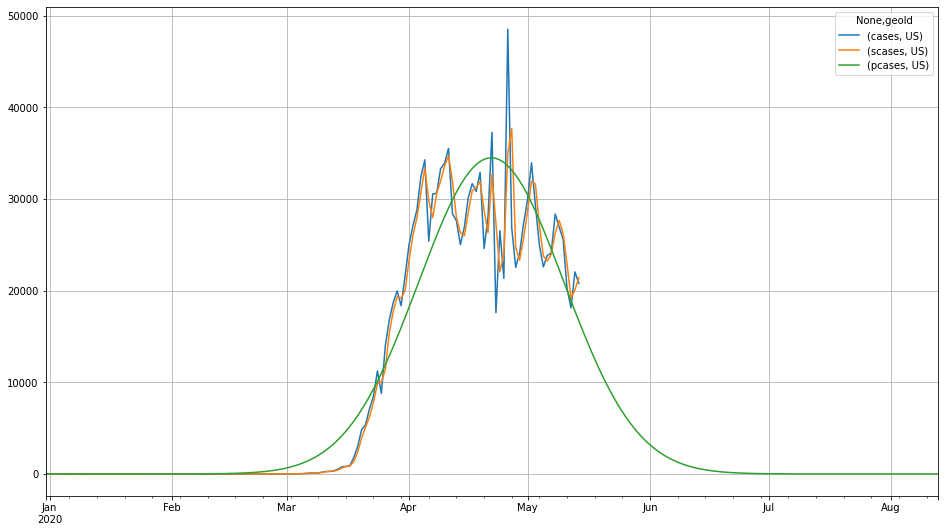

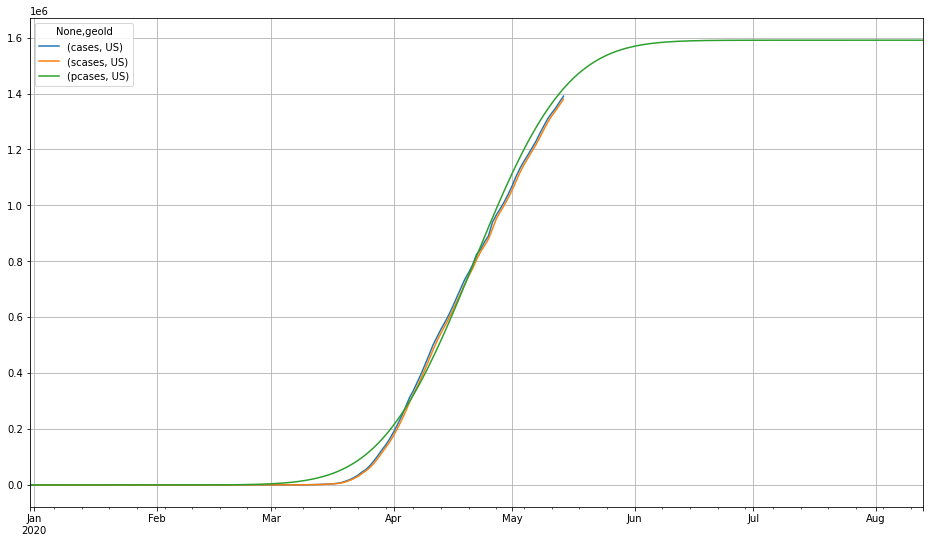

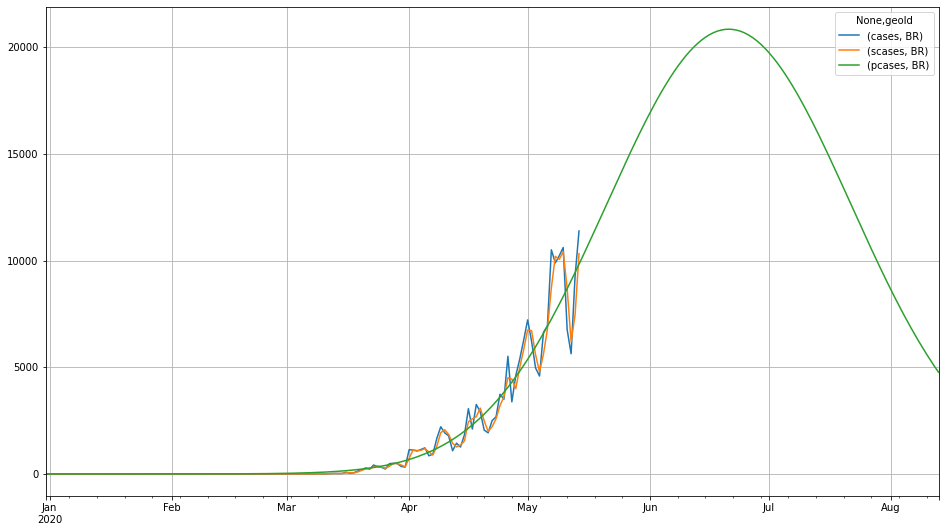

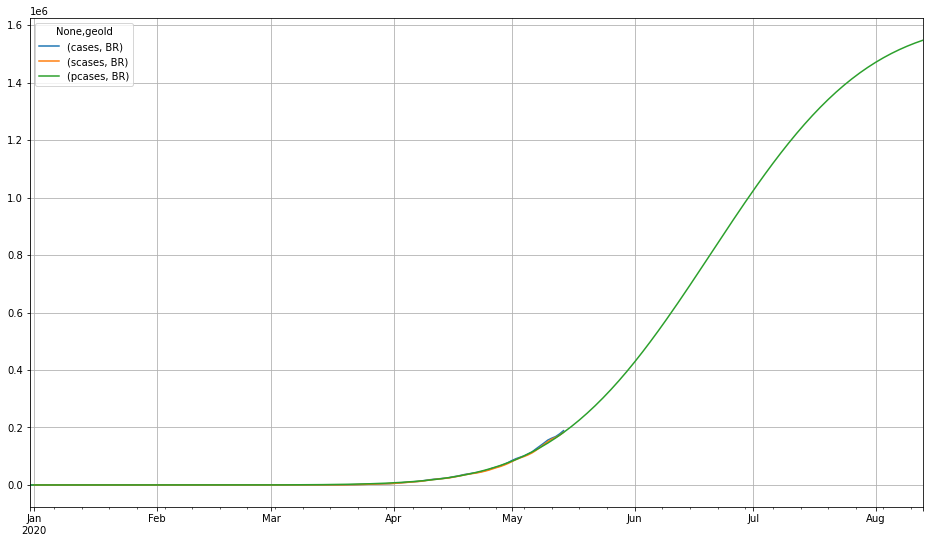

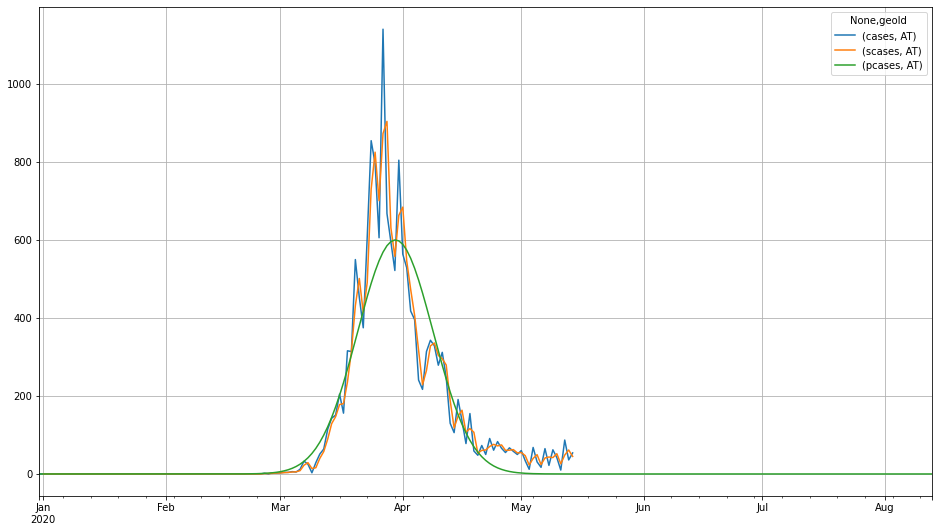

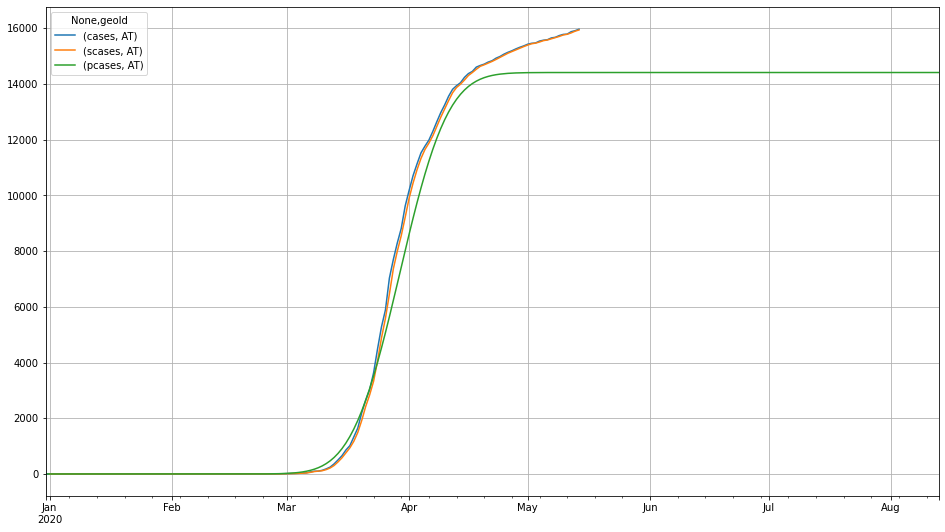

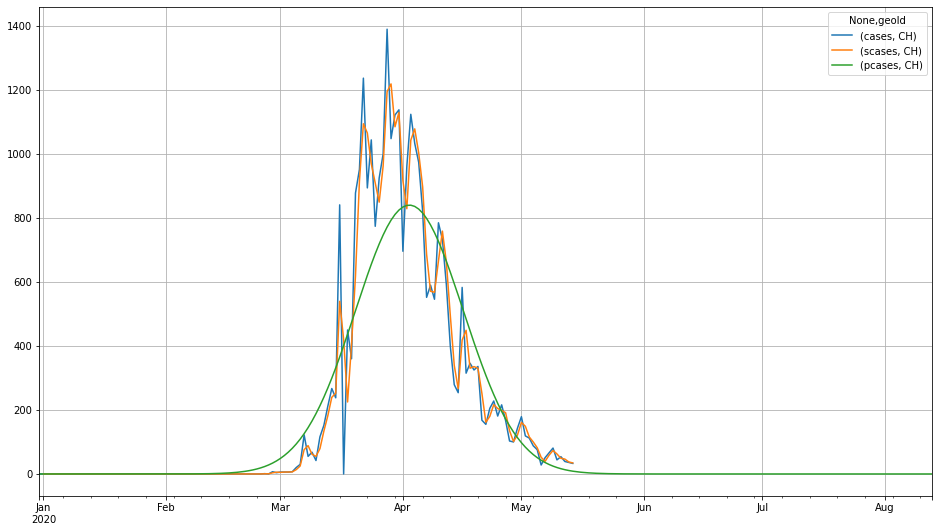

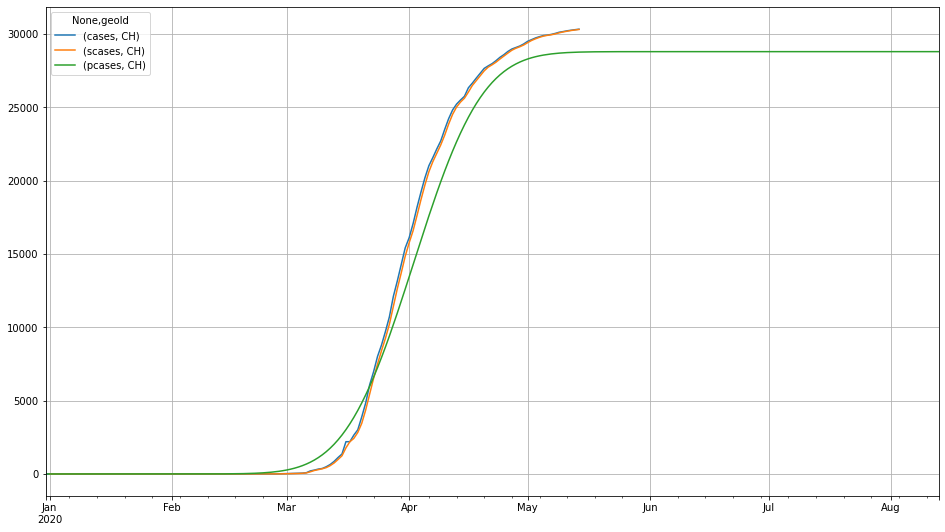

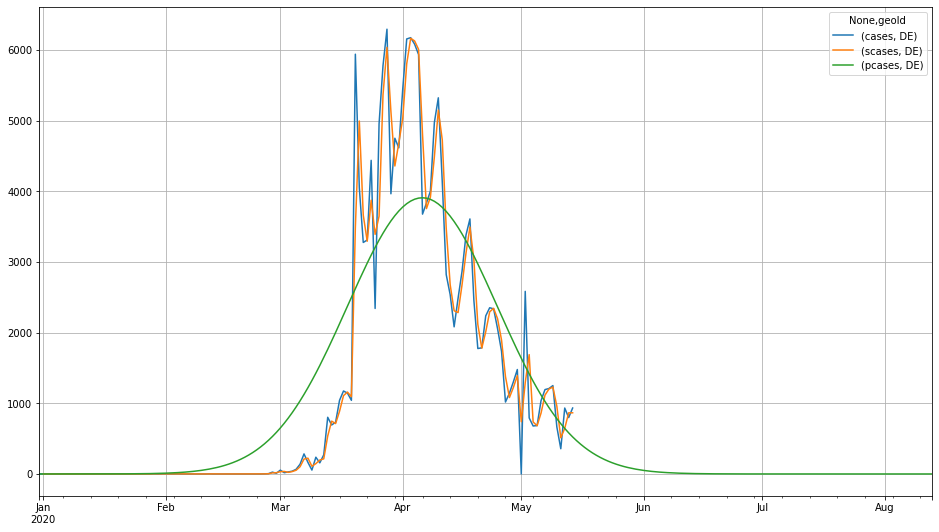

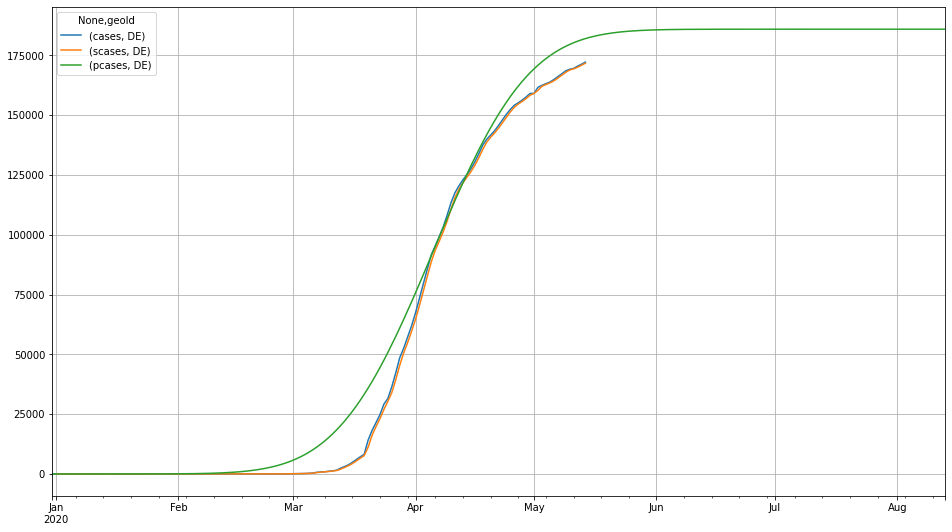

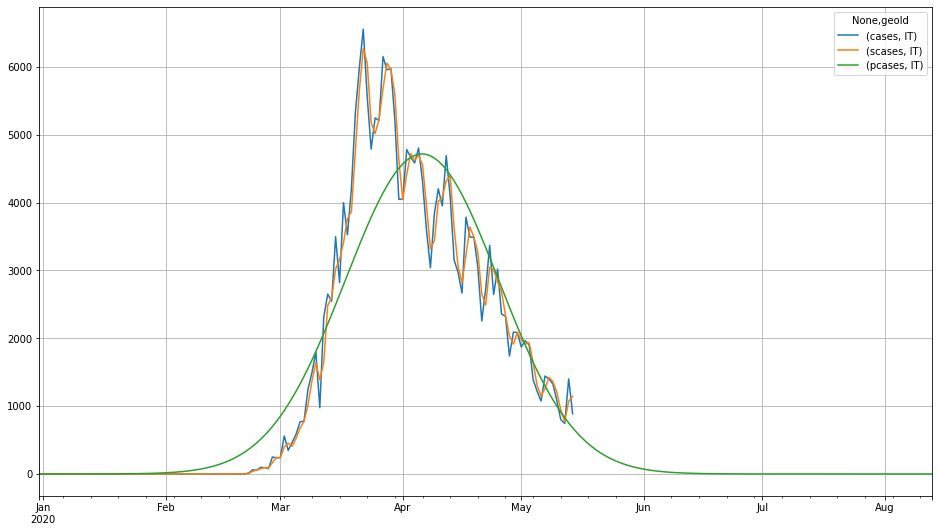

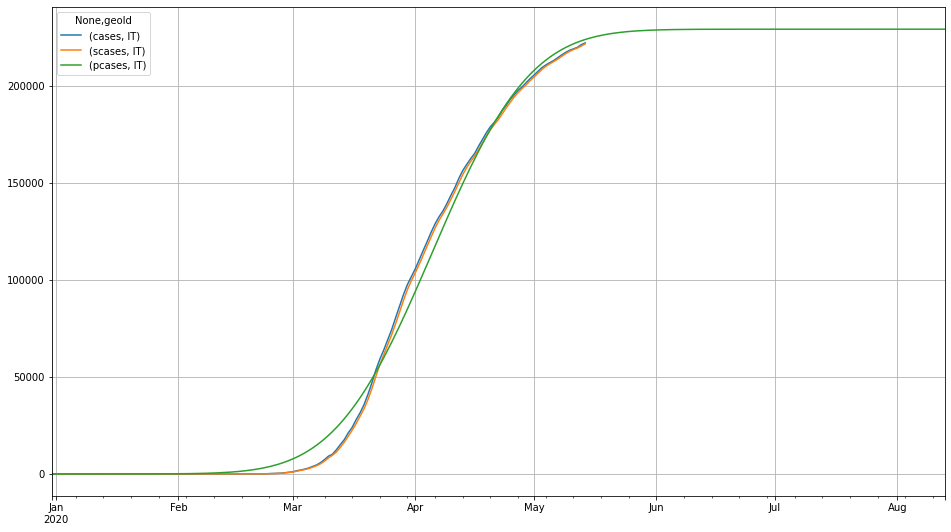

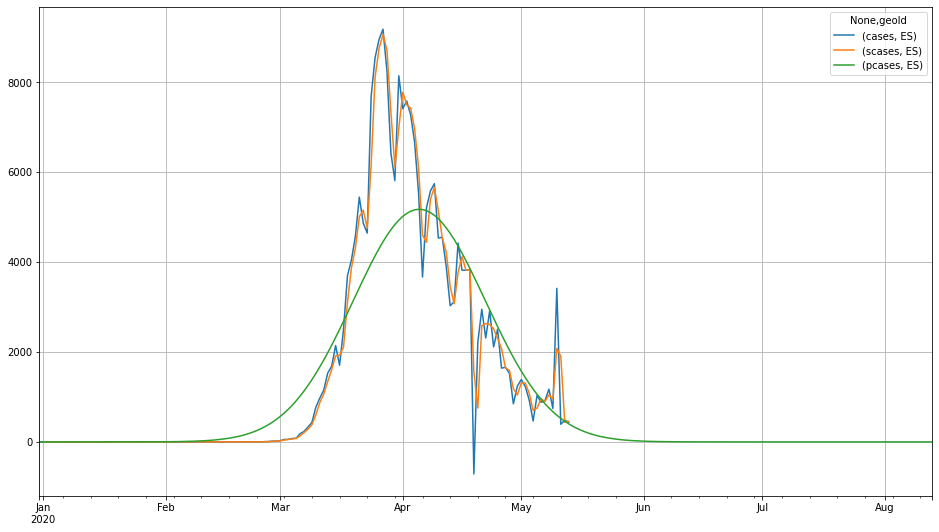

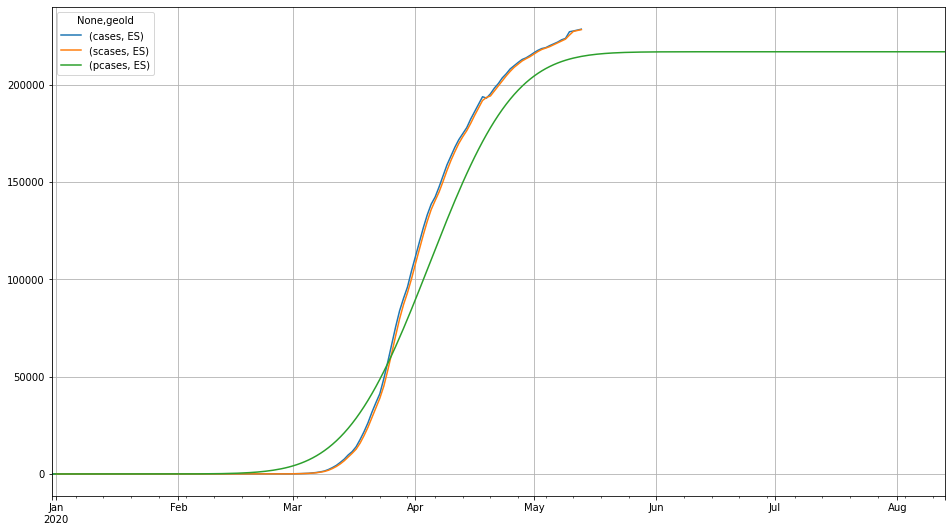

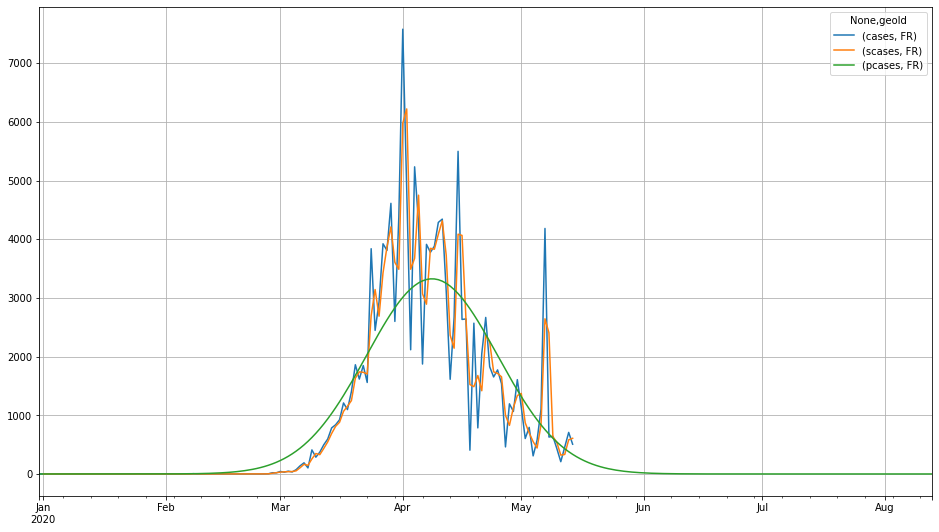

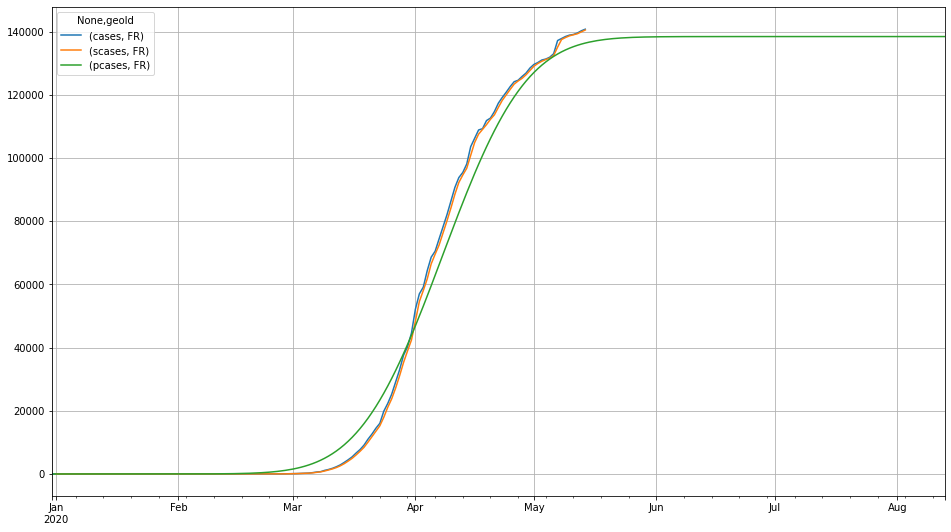

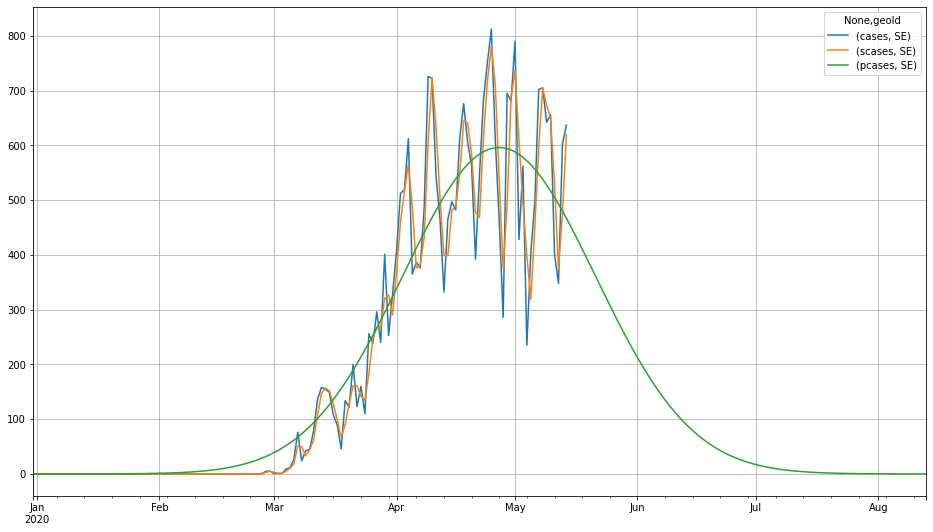

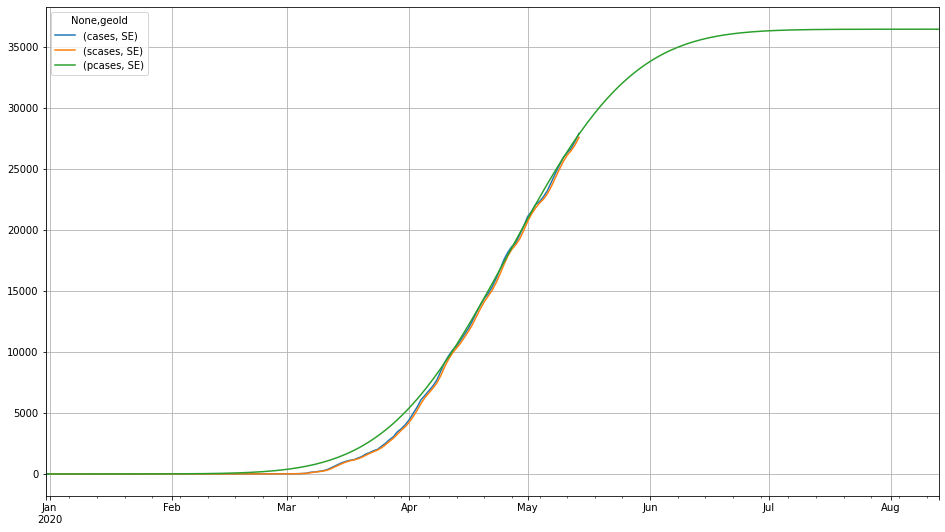

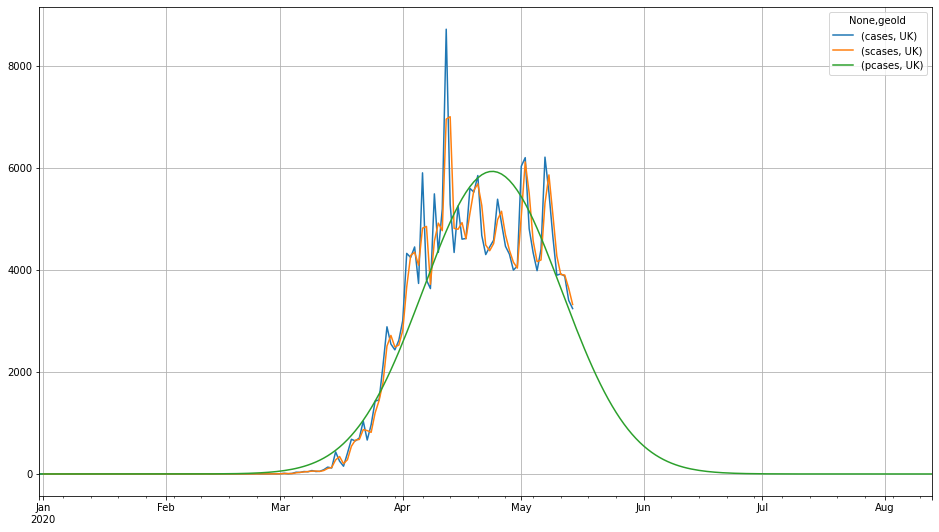

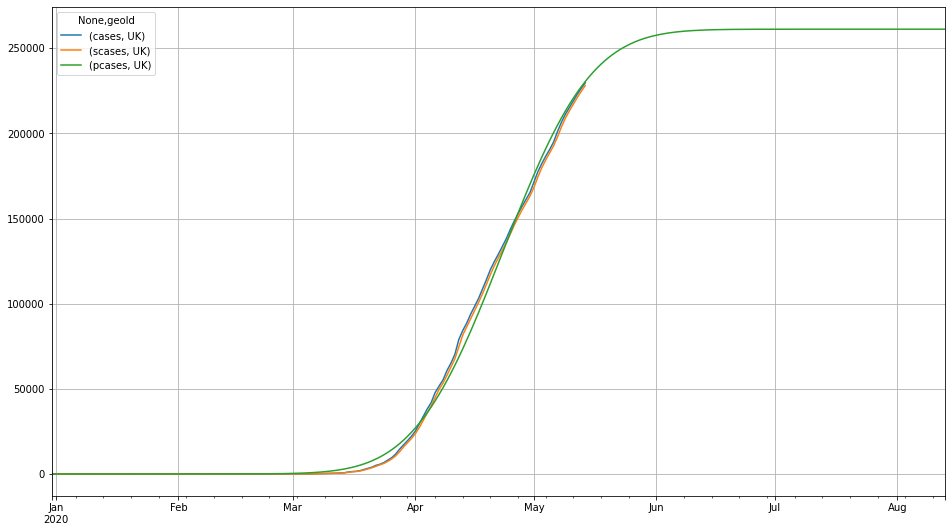

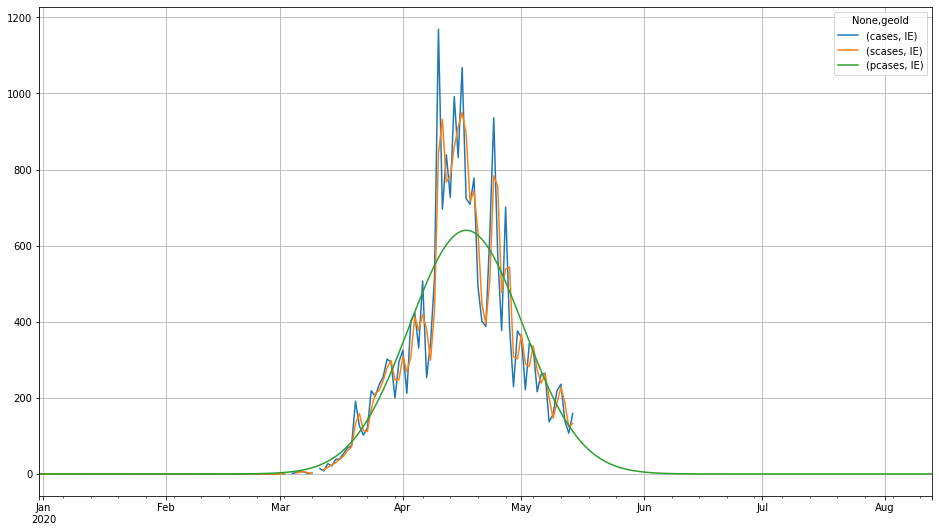

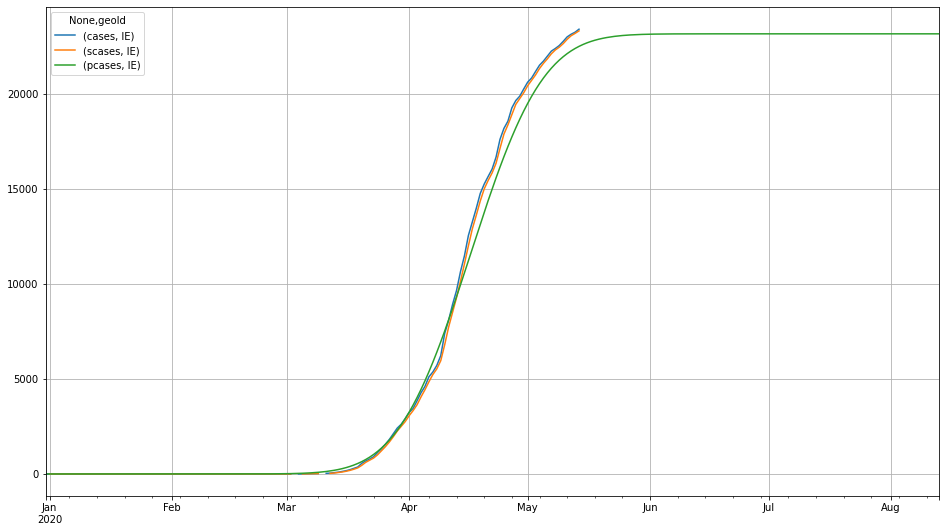

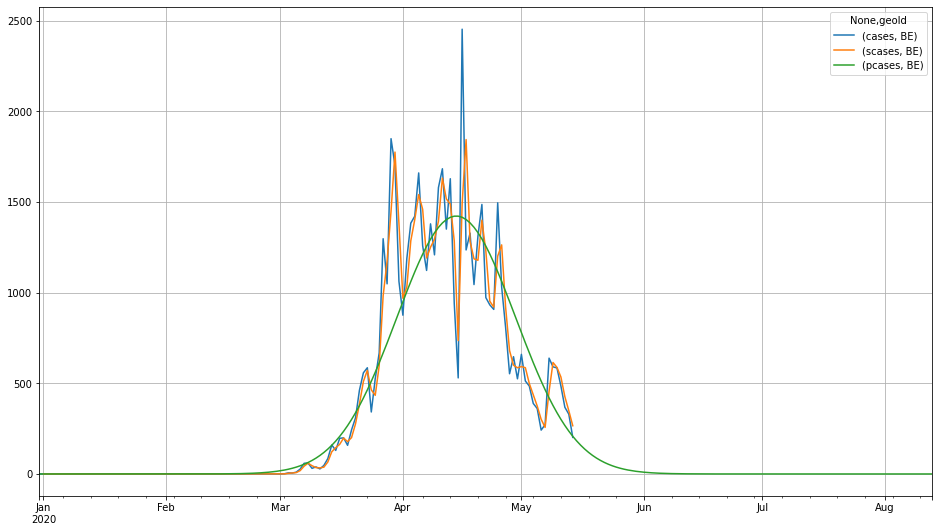

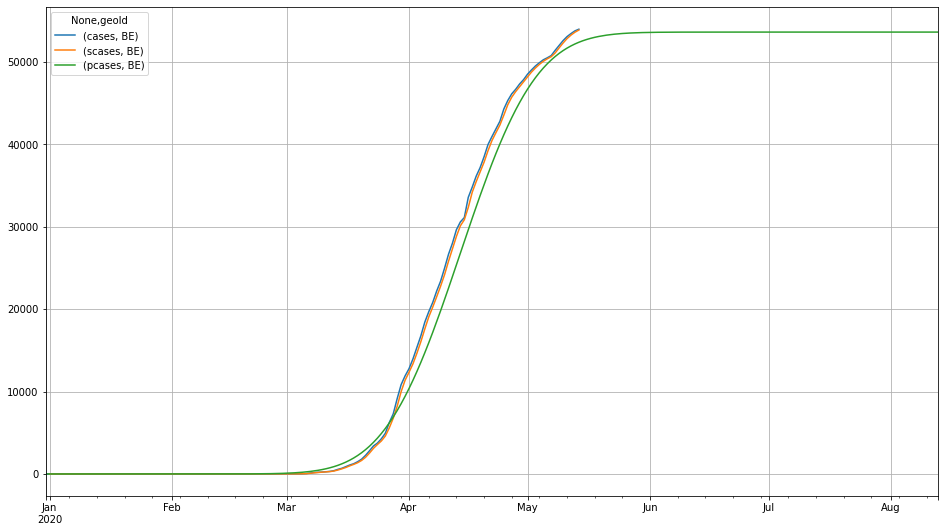

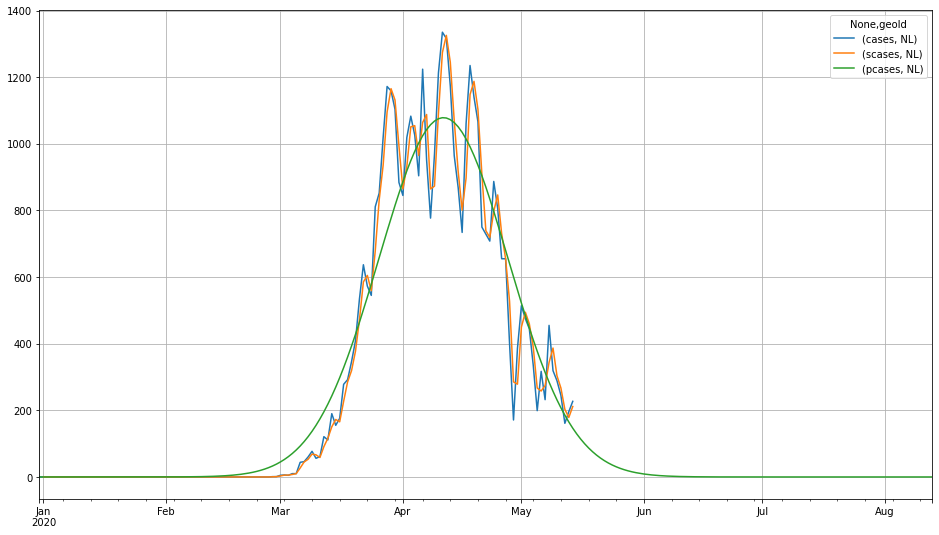

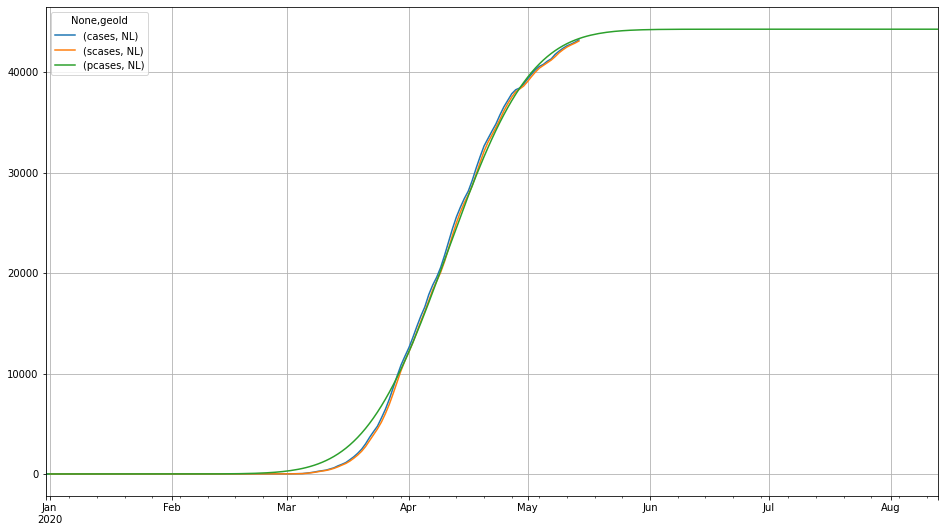

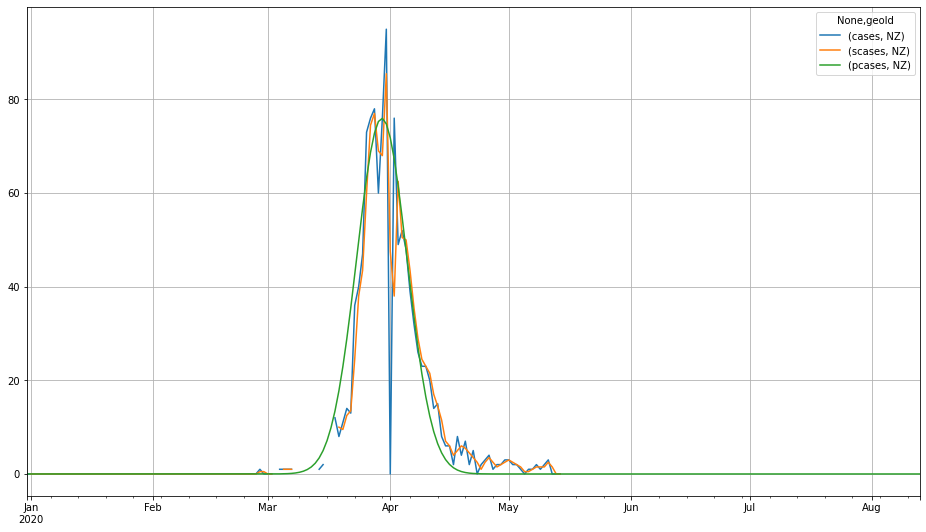

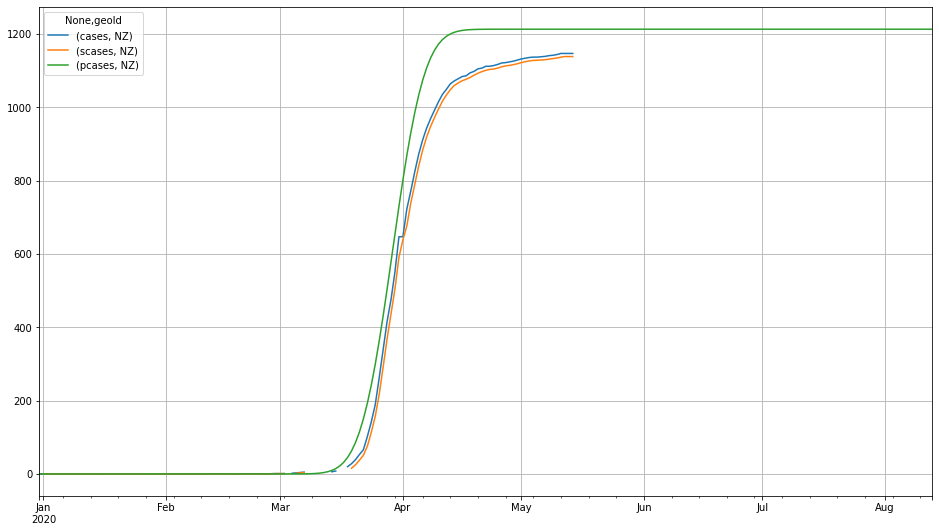

In [12]:
# countries = df['geoId'].unique()

countries = ['CN', 'JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'UK', 'IE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(2).mean()
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[smeasure][country]})
    df_pred = df_pred[df_pred['y'] > df[df['geoId'] == country]['popData2018'].iloc[0] / 1e5]
    df_pred['y'] = np.log10(df_pred['y'])
    if len(df_pred) > 3:
        fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
        df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
        print(country, "factors", fit[0], "residuals", fit[1][0])
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.